<a href="https://colab.research.google.com/github/Denisse0306/PRUEBA/blob/main/Laboratorio_4_Denisse_Lucia_Vazquez_Pelcastre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [106]:
In [16]: Ipath = '/content/drive/MyDrive/Conjunto de datos/{ a Mozilla5.0 (Windows NT 6.1; WOW.txt'
open(path).readline()

'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\n'

In [107]:
import json
path = '/content/drive/MyDrive/Conjunto de datos/{ a Mozilla5.0 (Windows NT 6.1; WOW.txt'
records = [json.loads(line) for line in open (path)]


In [108]:
In [19]: records[0]['tz']
Out[19]: u'America/New_York'
In [25]: time_zones = [rec['tz'] for rec in records]
In [26]: time_zones = [rec['tz'] for rec in records if 'tz' in rec]
In [27]: time_zones[:10]


['America/New_York', 'America/Denver', 'America/New_York']

In [83]:
def get_counts(sequence):
    counts = defaultdict(int)
    for x in sequence:
        counts[x] += 1
    return counts
    In [31]: counts = get_counts(time_zones)

In [92]:
 In [32]: counts['America/New_York']

2

In [81]:
In [33]: len(time_zones)

3

In [90]:
def top_counts(count_dict, n=10):
  value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
  value_key_pairs.sort()
  return value_key_pairs[-n:]
  In [35]: top_counts(counts)
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)

[('America/New_York', 2), ('America/Denver', 1)]

In [101]:
In [49]: from collections import Counter
In [50]: counts = Counter(time_zones)
In [51]: counts.most_common(10)

[('America/New_York', 2), ('America/Denver', 1)]

In [109]:
In [289]: from pandas import DataFrame, Series
In [290]: import pandas as pd
In [291]: frame = DataFrame(records)
In [292]: frame

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1331923247,1331822918,Danvers,"[42.576698, -70.954903]"
1,GoogleMaps/RochesterNY,US,0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1331923249,1308262393,Provo,"[40.218102, -111.613297]"
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1331923250,1331919941,Washington,"[38.9007, -77.043098]"


In [110]:
In [293]: frame['tz'][:10]

0    America/New_York
1      America/Denver
2    America/New_York
Name: tz, dtype: object

In [112]:
In [294]: tz_counts = frame['tz'].value_counts()
In [295]: tz_counts[:10]

America/New_York    2
America/Denver      1
Name: tz, dtype: int64

In [113]:
In [296]: clean_tz = frame['tz'].fillna('Missing')
In [297]: clean_tz[clean_tz == ''] = 'Unknown'
In [298]: tz_counts = clean_tz.value_counts()
In [299]: tz_counts[:10]

America/New_York    2
America/Denver      1
Name: tz, dtype: int64

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
Name: a, dtype: object

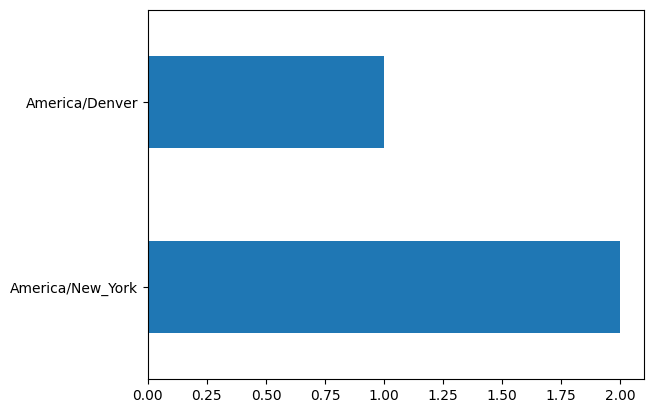

In [128]:
In [301]: tz_counts[:10].plot(kind='barh', rot=0)
In [302]: frame['a'][1]
In [303]: frame['a'][2]
In [304]: frame['a']

In [133]:
In [305]: results = Series([x.split()[0] for x in frame.a.dropna()])
In [306]: results[:5]
In [307]: results.value_counts()[:8]


Mozilla/5.0               1
GoogleMaps/RochesterNY    1
Mozilla/4.0               1
dtype: int64

In [143]:
In [308]: cframe = frame[frame.a.notnull()]
